# Lecture 6-Part 2

# Matrix Plots (Heatmap)

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data 


In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
%matplotlib inline

## Import Dataset

In [3]:
cars = pd.read_csv('Downloads/mtcars.csv')
cars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [20]:
cars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [4]:
# correlation data
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


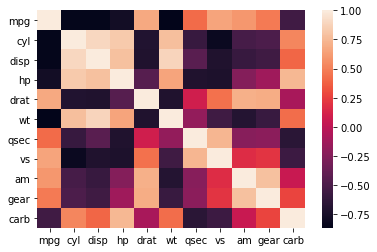

In [7]:
sns.heatmap(cars.corr())

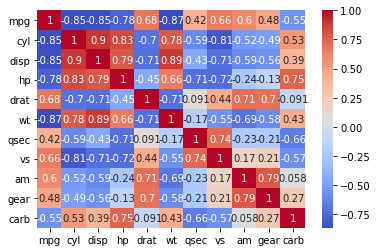

In [8]:
sns.heatmap(cars.corr(),cmap='coolwarm',annot=True)

In [26]:
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr


### The Pearson Correlation

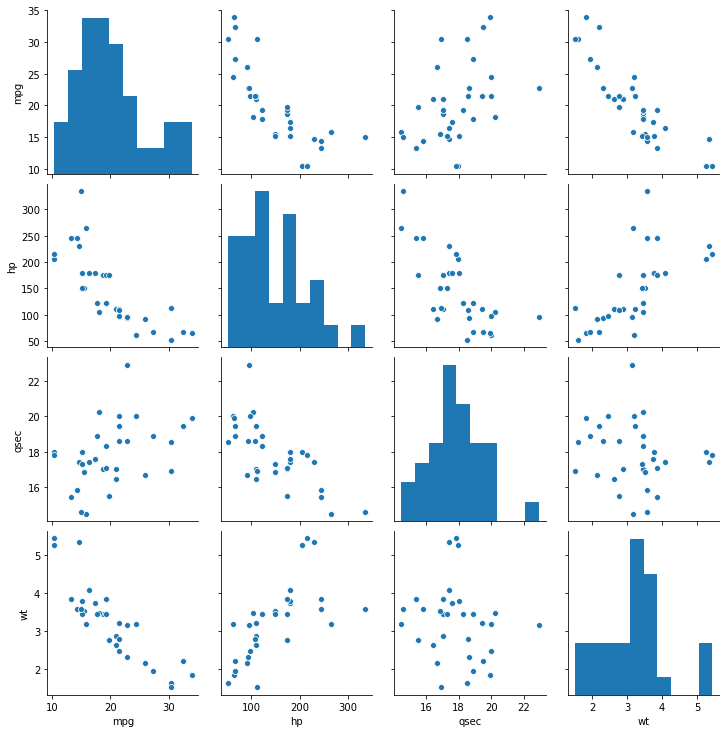

In [12]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sns.pairplot(X)

Here, we will calculate the Pearson correlation between different variables.

In [22]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

In [23]:
pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PeasonR Correlation Coefficient %0.3f'% (pearsonr_coefficient))

PeasonR Correlation Coefficient -0.776


In [ ]:
#### Example1: Please use the empty code cells below to calculate the pearsonr_coefficient for the following pair of variables:

    1- (mpg, qsec)
    2- (mpg, wt)

### Using pandas to calculate the Pearson correlation coefficient

In [24]:
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


In [ ]:
#### Example 2: What do the dark (black) shades and light (white) shades indicate in the heatmap?

## The Spearman Rank Correlation


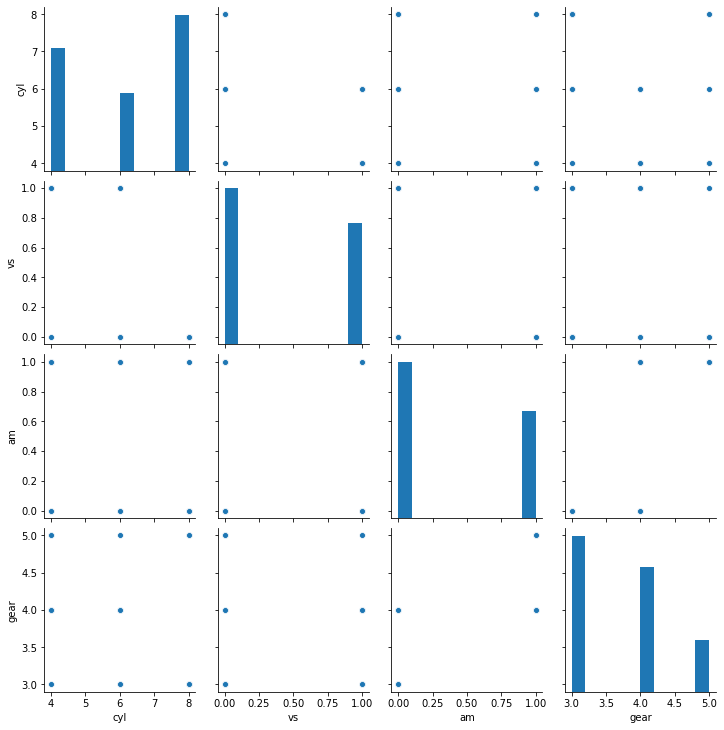

In [28]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sns.pairplot(X)


In [32]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']
spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))


Spearman Rank Correlation Coefficient -0.814


## Chi-square test for independence


In [33]:
table = pd.crosstab(cyl, am)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print ('Chi-square statistic %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistic 8.741 p_value 0.013


## Math and Statistics

In [34]:
cars = pd.read_csv('Downloads/mtcars.csv')
cars.columns

Index(['name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

Looking at summary statistics that decribe a variable's numeric values


In [35]:
cars.sum()


name    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                 642.9
cyl                                                   198
disp                                               7383.1
hp                                                   4694
drat                                               115.09
wt                                                102.952
qsec                                               571.16
vs                                                     14
am                                                     13
gear                                                  118
carb                                                   90
dtype: object

In [36]:
cars.sum(axis=1)


0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [ ]:
#Example: what is a different of cars.sum() and cars.sum(axis=1)?


In [37]:
cars.median()


mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [38]:
cars.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [ ]:
#Example:mwhat is value of median and mean parameter for gear variable?


In [39]:
cars.max()


name    Volvo 142E
mpg           33.9
cyl              8
disp           472
hp             335
drat          4.93
wt           5.424
qsec          22.9
vs               1
am               1
gear             5
carb             8
dtype: object

### Looking at summary statistics that describe variable distribution


we will calculate standard deviation and variance for car dataset.


In [41]:
cars.std()


mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [42]:
cars.var()


mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [43]:
cars.describe()


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000
